In [ ]:
 from google.colab import files
uploaded = files.upload()

Saving P3- Churn-Modelling Data.xlsx to P3- Churn-Modelling Data (1).xlsx


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load dataset
df = pd.read_excel('P3- Churn-Modelling Data.xlsx')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Data has no null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
dtype: int64

In [ ]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#checking the columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned'],
      dtype='object')

In [ ]:
# now we have to create age groups and checking max age in this group
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [ ]:
#defining age groups
age_groups = ['0-18', '19-25', '26-35', '36-45', '46-55','55-65','65+']
df['Age_group'] =  pd.cut(df['Age'],bins = [0,18,25,35,45,55,65,100], labels = age_groups, right=False)


In [ ]:
# Age group distribution
age_distribution = df['Age_group'].value_counts().sort_index()

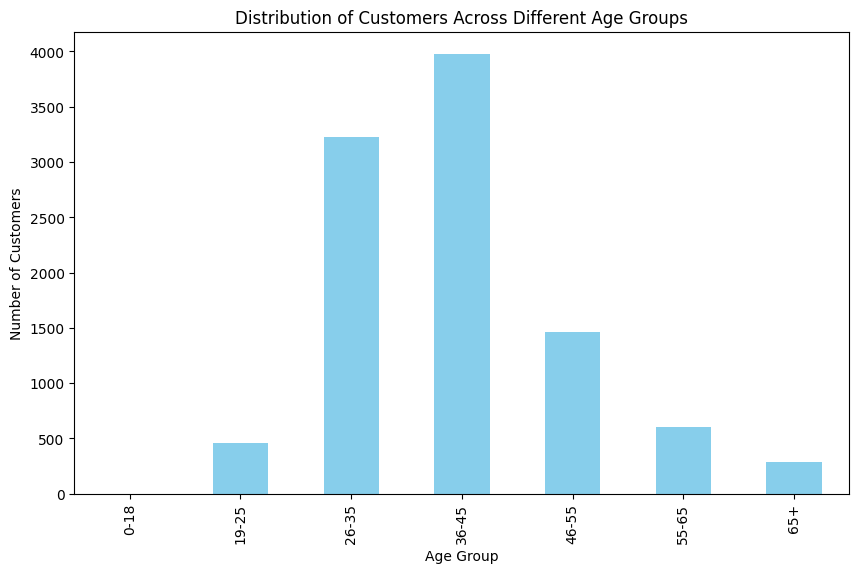

In [ ]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

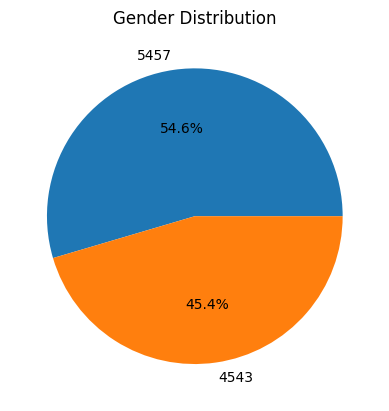

In [ ]:
#gender distribution
gender_distribution = df['Gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show

In [ ]:
churn_rate = df['churned'].mean() * 100

In [ ]:
print(f"The percentage of customers who have churned is: {churn_rate:.2f}%")

The percentage of customers who have churned is: 20.37%


In [ ]:
# Select only numeric columns for analysis
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
churned_customers = df[df['churned'] == 1]
not_churned_customers = df[df['churned'] == 0]

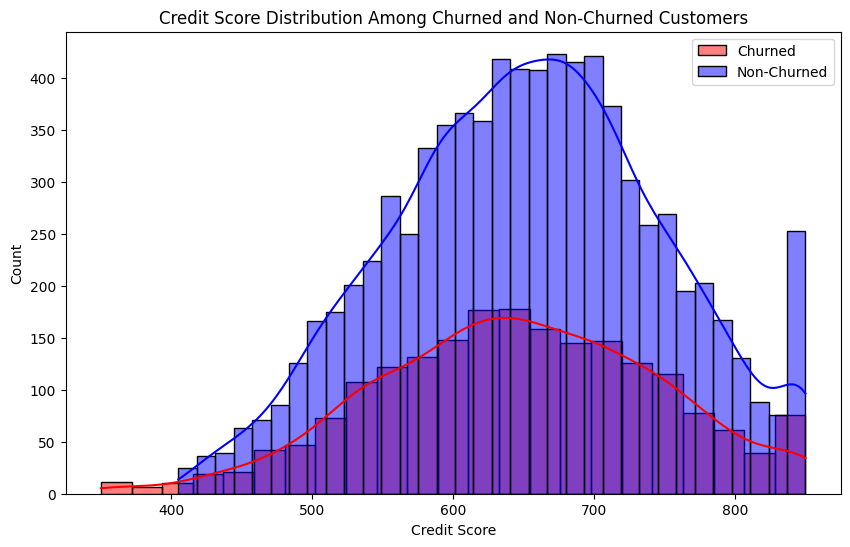

In [ ]:
# Credit Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['CreditScore'], kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['CreditScore'], kde=True, color='blue', label='Non-Churned')
plt.title('Credit Score Distribution Among Churned and Non-Churned Customers')
plt.xlabel('Credit Score')
plt.legend()
plt.show()

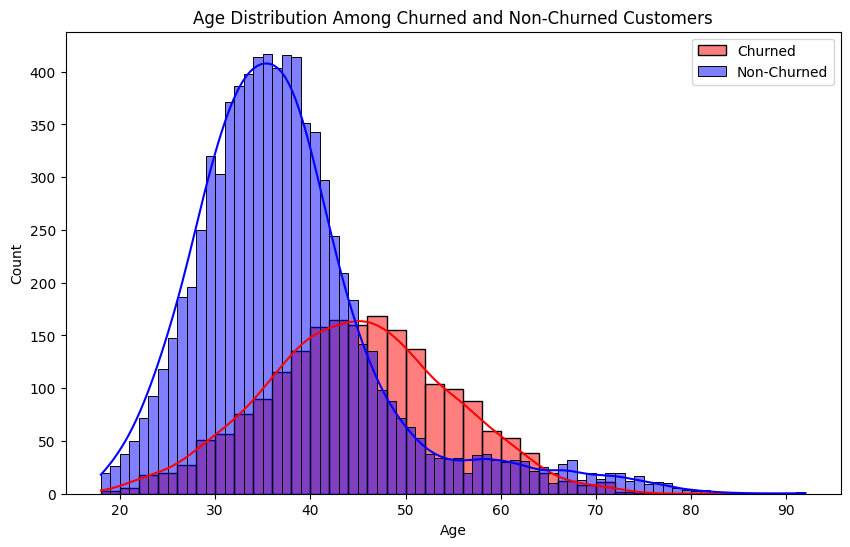

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['Age'], kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['Age'], kde=True, color='blue', label='Non-Churned')
plt.title('Age Distribution Among Churned and Non-Churned Customers')
plt.xlabel('Age')
plt.legend()
plt.show()

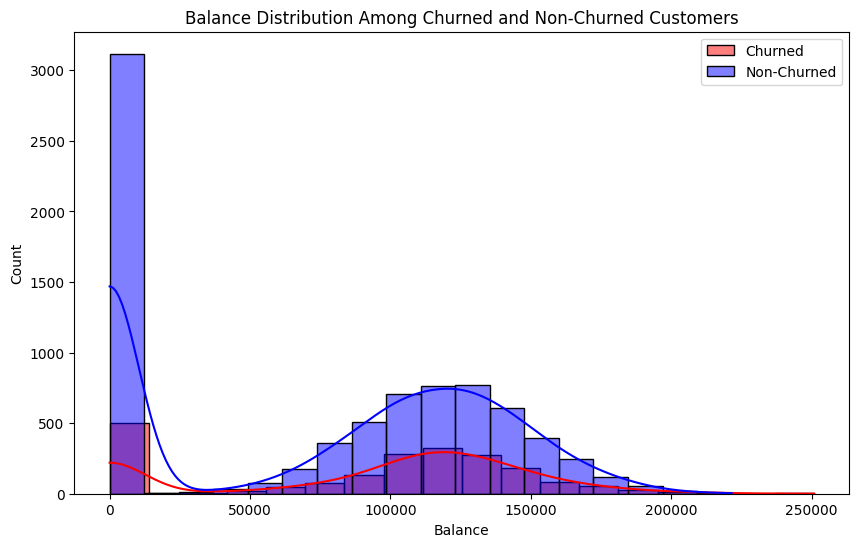

In [ ]:
# Balance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['Balance'], kde=True, color='red', label='Churned')
sns.histplot(non_churned_customers['Balance'], kde=True, color='blue', label='Non-Churned')
plt.title('Balance Distribution Among Churned and Non-Churned Customers')
plt.xlabel('Balance')
plt.legend()
plt.show()

In [ ]:
# Categorical Analysis
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

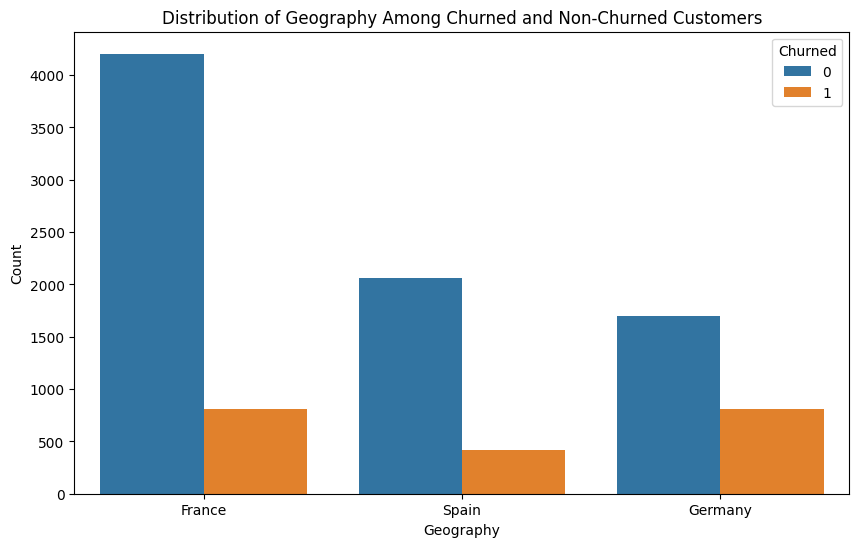

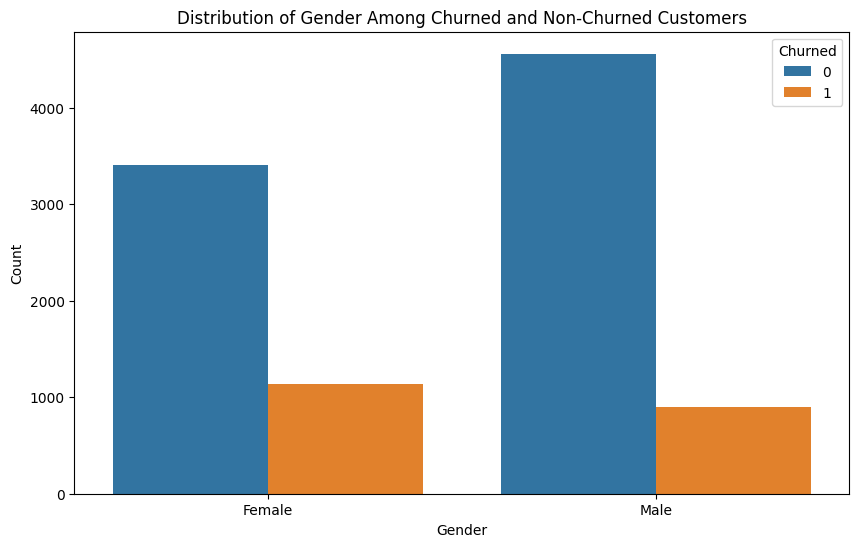

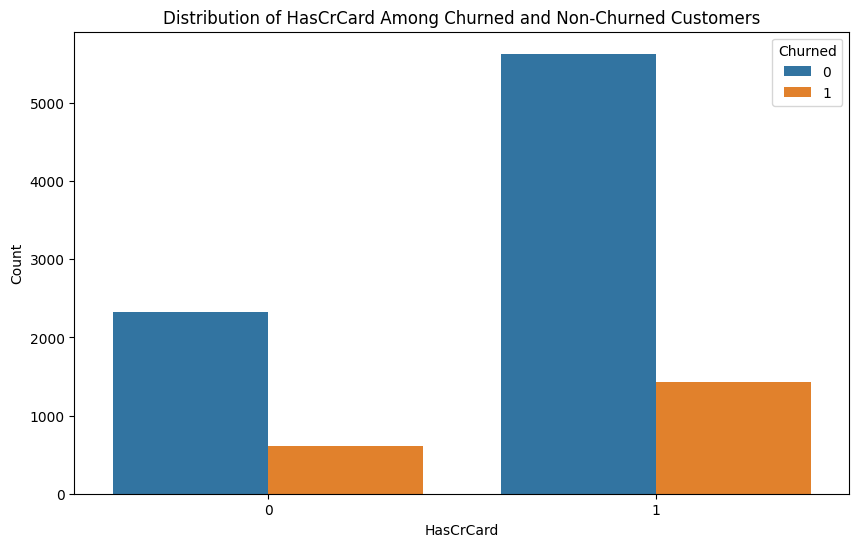

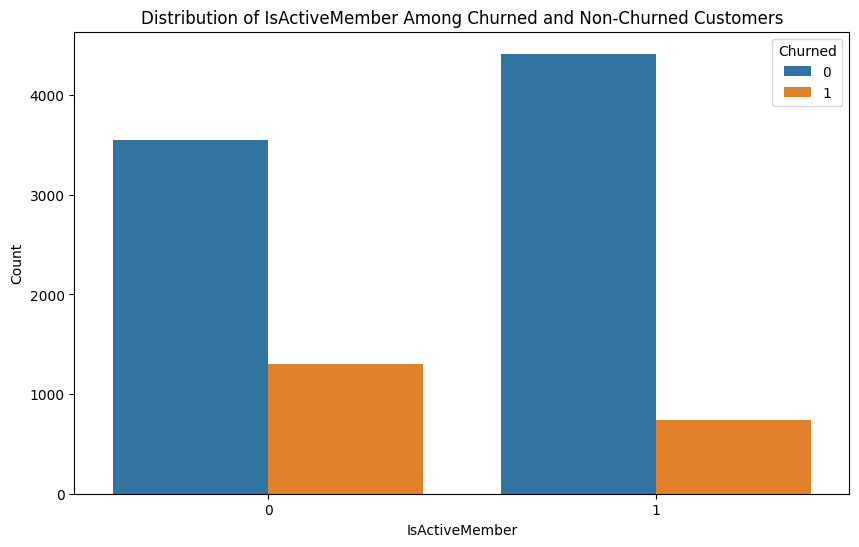

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='churned')
    plt.title(f'Distribution of {col} Among Churned and Non-Churned Customers')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churned', loc='upper right')
    plt.show()

In [ ]:
common_products = df['NumOfProducts'].value_counts().sort_index()

In [ ]:
print(common_products)


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


In [ ]:
# Group by Gender
gender_groups = df['Gender'].unique()

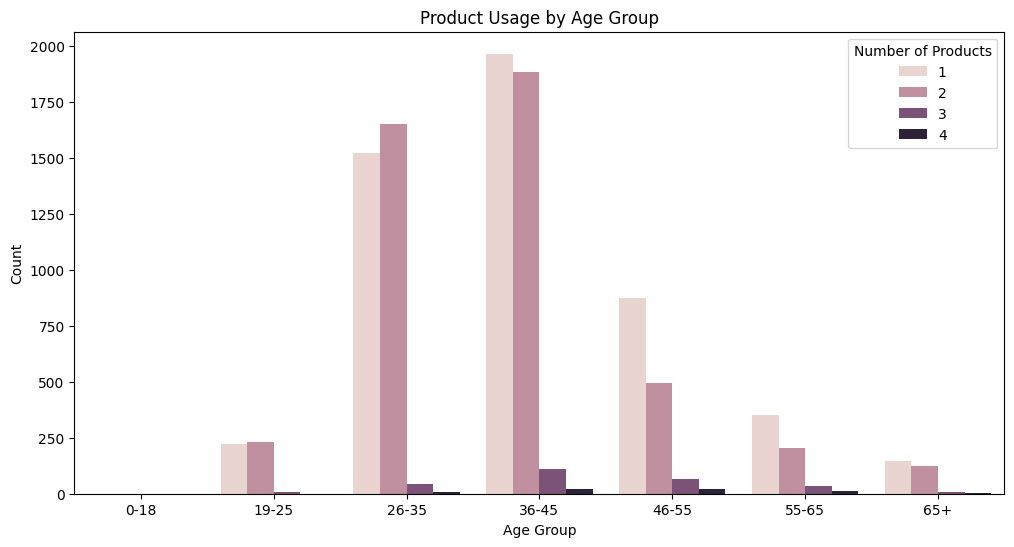

In [ ]:
# Visualize usage patterns
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age_group', hue='NumOfProducts')
plt.title('Product Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Number of Products')
plt.show()

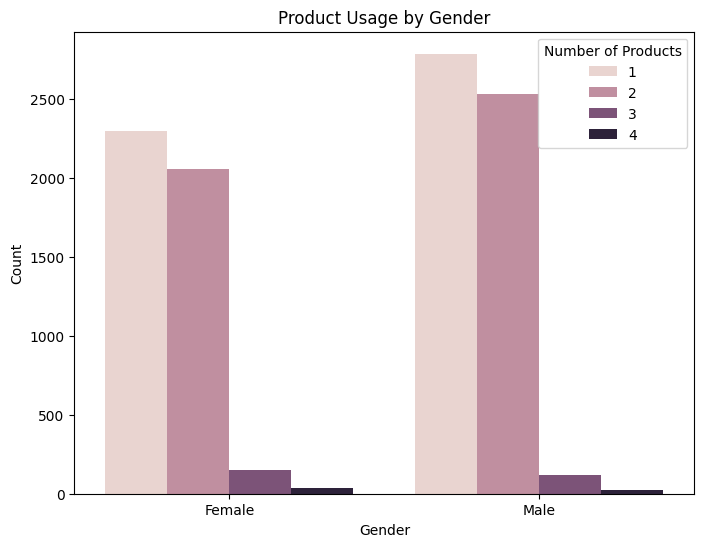

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='NumOfProducts')
plt.title('Product Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Number of Products')
plt.show()

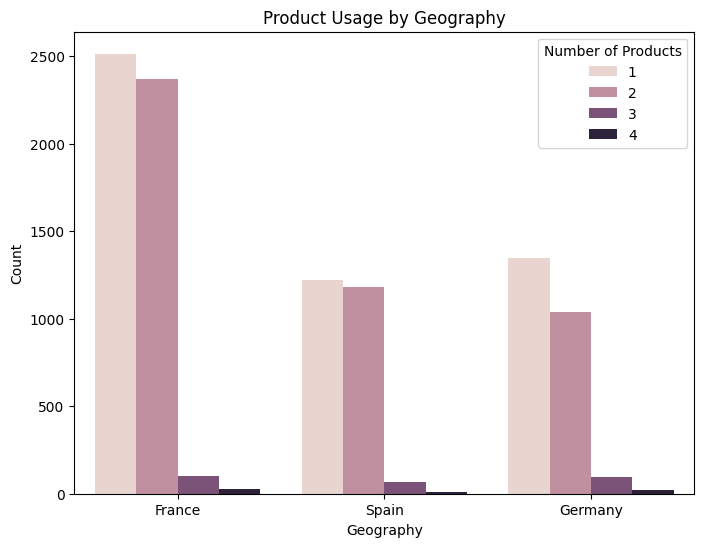

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Geography', hue='NumOfProducts')
plt.title('Product Usage by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Number of Products')
plt.show()

In [ ]:
# 1. Calculate Average Account Balance
average_balance = df['Balance'].mean()
print(f"Average Account Balance: {average_balance:.2f}")

Average Account Balance: 76485.89


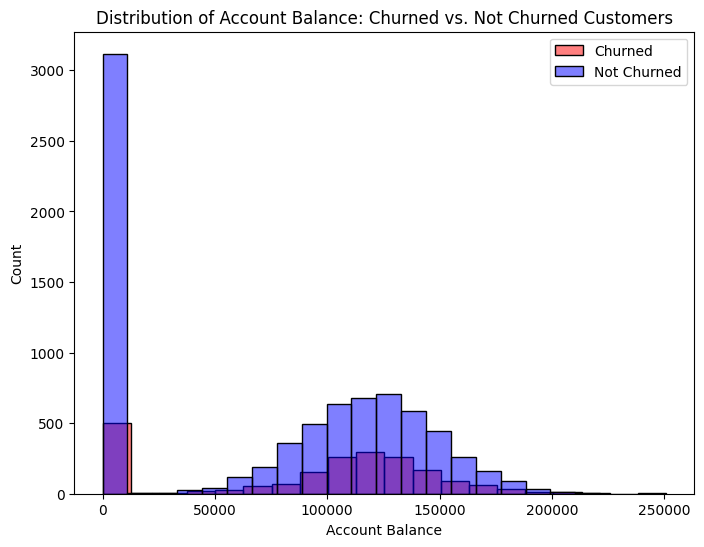

In [ ]:
# Visualize comparison of account balances
plt.figure(figsize=(8, 6))
sns.histplot(data=churned_customers, x='Balance', bins=20, color='red', alpha=0.5, label='Churned')
sns.histplot(data=not_churned_customers, x='Balance', bins=20, color='blue', alpha=0.5, label='Not Churned')
plt.title('Distribution of Account Balance: Churned vs. Not Churned Customers')
plt.xlabel('Account Balance')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Select relevant features and target variable manually as in starting we have not dropped the column that are not useful
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['churned']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# our data is on different scale like age and balance so we have to bring down on same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# using Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.55      0.16      0.24       584

    accuracy                           0.81      3000
   macro avg       0.69      0.56      0.57      3000
weighted avg       0.77      0.81      0.77      3000



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[2343   73]
 [ 493   91]]


In [ ]:
# Feature importance (for interpretation)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
           Feature  Importance
1              Age    0.753517
3          Balance    0.307502
7  EstimatedSalary    0.010276
4    NumOfProducts   -0.000774
5        HasCrCard   -0.023629
2           Tenure   -0.061682
0      CreditScore   -0.067701
6   IsActiveMember   -0.526864
